<a href="https://colab.research.google.com/github/MinoDe/Bulldozer-Bluebook-fastai/blob/master/bulldozer_blue_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import os

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [0]:
#Cell that should be run everytime we have a new VM
!pip install fastai

##CLASSIFICATION

In [0]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [0]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [0]:
sns.countplot(wine['quality'])

In [0]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [0]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]


In [0]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [0]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

In [5]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 6.4MB/s 
    100% |████████████████████████████████| 496.4MB 29kB/s 
    100% |████████████████████████████████| 184kB 29.8MB/s 
    100% |████████████████████████████████| 71kB 25.1MB/s 
    100% |████████████████████████████████| 3.6MB 3.5MB/s 
    100% |████████████████████████████████| 1.5MB 6.2MB/s 
    100% |████████████████████████████████| 61kB 21.5MB/s 
    100% |████████████████████████████████| 92kB 23.8MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 11.6MB 1.8MB/s 
    100% |████████████████████████████████| 81kB 24.4MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \

##fastai learning
Course from https://course.fast.ai/lessonsml1/lesson2.html



In [0]:
from fastai.imports import *
from fastai.structured import *

In [0]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [69]:
!mkdir -p data/bulldozers
PATH = "data/bulldozers/"
!ls {PATH}
!cp Train.csv data/bulldozers/

Train.csv


In [0]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,
                    parse_dates = ["saledate"])

In [0]:
def display_all(df):
  with pd.option_context("display.max_rows", 1000):
    with pd.option_context("display.max_columns", 1000):
      display(df)

In [72]:
display_all(df_raw.sample(7))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
278617,1844487,8000,1484260,18088,132,5.0,1989,NaN,NaN,2008-11-14,3500Z,3500,Z,NaN,NaN,Medium,Wheel Loader - 200.0 to 225.0 Horsepower,Connecticut,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
193762,1631109,17500,1326399,4606,132,1.0,1997,6741.0,Medium,2011-03-18,310SE,310,SE,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,New Mexico,BL,Backhoe Loaders,Four Wheel Drive,EROPS w AC,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384443,4314501,15000,2211410,14350,172,1.0,2004,3200.0,Medium,2010-12-09,50CZTS,50,C,NaN,ZTS,Mini,"Hydraulic Excavator, Track - 4.0 to 5.0 Metric...",Washington,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
31973,1264758,7250,1491485,6634,132,14.0,1982,NaN,NaN,1996-09-28,1845,1845,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,Indiana,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148365,1521304,75000,150238,1561,132,1.0,1995,1900.0,High,1997-04-29,D4HIILGP,D4,H,II,LGP,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Tennessee,TTT,Track Type Tractors,NaN,EROPS w AC,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,3 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
12360,1179747,40000,908626,1177,121,3.0,1994,6715.0,Low,2008-05-29,320L,320,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",Tennessee,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,32 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
348873,2408332,52000,1230890,16691,136,1.0,2004,7363.0,Medium,2009-10-14,WA320-5,WA320,NaN,-5,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

##PreProcessing
Random Forest

In [74]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [0]:
add_datepart(df_raw, 'saledate')

In [76]:
df_raw.saleDayofweek.head()

0    3
1    4
2    3
3    3
4    3
Name: saleDayofweek, dtype: int64

In [0]:
train_cats(df_raw)

In [0]:
df_raw.UsageBand.cat.categories
#Ordering the categories so it makes sense
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace = True)

In [79]:
display_all(df_raw.tail())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800
401124,6333342,8.955448,1926965,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800


In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [81]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [82]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830834680887581

In [0]:
?m.score

In [84]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 12000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
  res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
        m.score(X_train, y_train), m.score(X_valid, y_valid)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [86]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 45s, sys: 162 ms, total: 1min 45s
Wall time: 53.9 s
[0.09043050294455225, 0.24876395876598859, 0.9829091084416511, 0.8894845763417755]


In [0]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice', subset=30000)
X_train, _ = split_vals(df_trn,20000)
y_train, _ = split_vals(y_trn, 20000)

In [88]:
m = RandomForestRegressor(n_jobs=1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.81 s, sys: 3.01 ms, total: 2.81 s
Wall time: 2.81 s
[0.11235471169354361, 0.38055551272932686, 0.9721549386498627, 0.7413669573605097]


##Single Tree

In [0]:
??RandomForestRegressor

In [94]:
m = RandomForestRegressor(n_jobs=1, n_estimators =1, max_depth = 3, bootstrap=False)
m.fit(X_train, y_train)
print_score(m)

[0.5217379007150805, 0.5823203845863132, 0.39955895433720257, 0.39441939100494294]


In [0]:
draw_tree(m.estimators_[0], df_trn, precision=3)

##Bagging


In [103]:
m = RandomForestRegressor(n_jobs=1)
m.fit(X_train, y_train)
print_score(m)

[0.10366502023223903, 0.364621117031814, 0.9762955396158655, 0.7625721781075031]


In [104]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.68034, 9.18502, 9.32812, 9.30565, 9.25913, 9.21034, 8.9872 , 9.32812, 9.43348, 9.15905, 9.25913,
        9.3501 , 9.39266, 9.32812, 9.21034, 9.18502, 9.21034, 9.15905, 9.32812, 8.9872 ]),
 9.264327573132467,
 9.104979856318357)

In [99]:
preds.shape

(10, 12000)

###Using Extra Trees Regressor

In [100]:
from sklearn.ensemble import ExtraTreesRegressor
e = RandomForestRegressor(n_jobs=1)
e.fit(X_train, y_train)
print_score(e)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11275367506219303, 0.3699562555154009, 0.971956835994168, 0.7555732550793522]


###Plotting the predictions

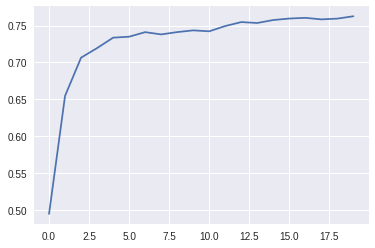

In [106]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(10)])

In [108]:
m = RandomForestRegressor(n_jobs=1,  n_estimators =20)
m.fit(X_train, y_train)
print_score(m)

[0.10257026508062934, 0.36795447206347975, 0.9767935582228138, 0.7582112192514382]


In [109]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([8.9872 , 9.15905, 9.15905, 9.10498, 9.30565, 9.39266, 9.39266, 9.32812, 9.15905, 9.30565, 9.4727 ,
        8.9872 , 9.18502, 8.9872 , 8.9872 , 9.32812, 9.18502, 8.9872 , 9.21034, 9.82553]),
 9.22247965581153,
 9.104979856318357)

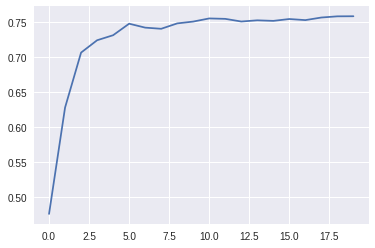

In [110]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(20)])

###OOB(Out-of-bag) score

In [111]:
m = RandomForestRegressor(n_jobs=1,  n_estimators =40, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[0.09711906298437882, 0.35479555962366577, 0.9791946719943174, 0.7751958492521716, 0.8518187183367546]
